In [21]:
%run functions.py

<AxesSubplot:title={'center':'Dnister flow rate'}, xlabel='Date, days', ylabel='River level, $h$, сm.'>

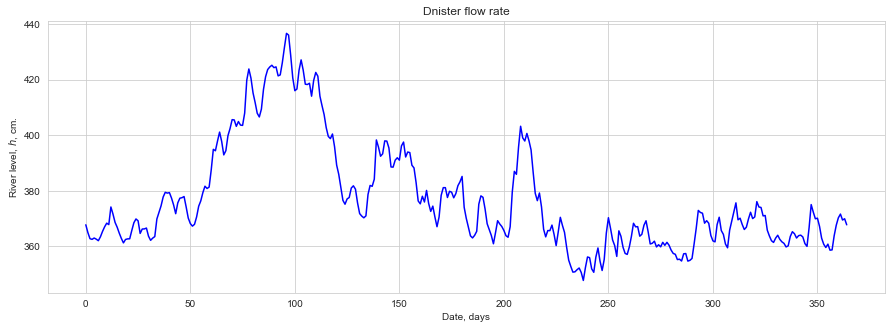

In [22]:
level = pd.read_excel('Data\Dnister_level.xlsx')
level = level.rename(columns={'Date': 'ds', 'Water_level': 'y'})
level = filter_29_february(level)
level_trend = define_trend(level)
level_m = remove_trend(level, level_trend)
water_level_plot(level_trend, xlabel='Date, days')

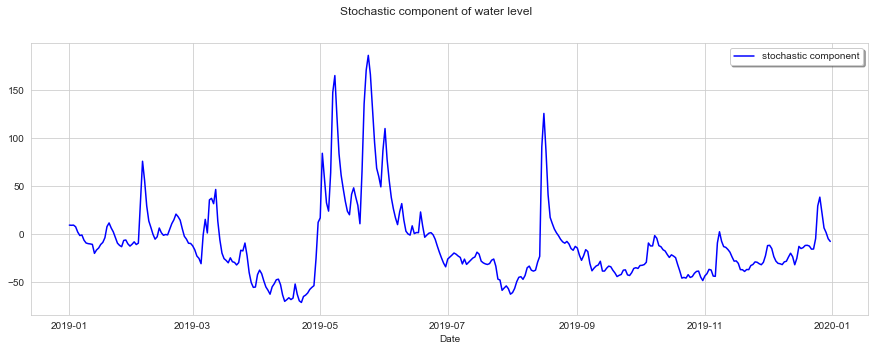

In [30]:
last_two_years=level_m.loc[level_m.ds >= '2019-01-01']
fig, axes = plt.subplots(figsize=(15, 5))
fig.suptitle('Stochastic component of water level')
axes.plot(last_two_years.ds, last_two_years.y, label='stochastic component', color='blue')
axes.set_xlabel('Date')
axes.legend(shadow=True, fancybox=True)
plt.show()

<AxesSubplot:title={'center':'Dnister flow rate'}, xlabel='Date, days', ylabel='River flow rate, $Q$$, m^3/s$'>

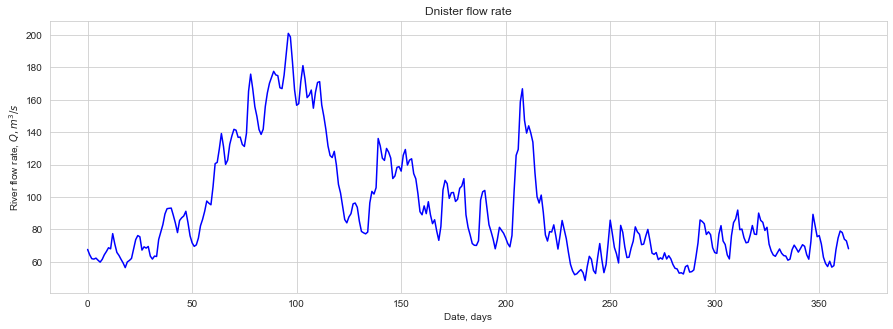

In [31]:
flow = pd.read_excel('Data\Dnister_flow.xlsx')
flow = flow.rename(columns={'Date': 'ds', 'Flow': 'y'})
flow = filter_29_february(flow)
flow_trend = define_trend(flow)
flow_m = remove_trend(flow, flow_trend)
water_flow_plot(flow_trend, xlabel='Date, days')

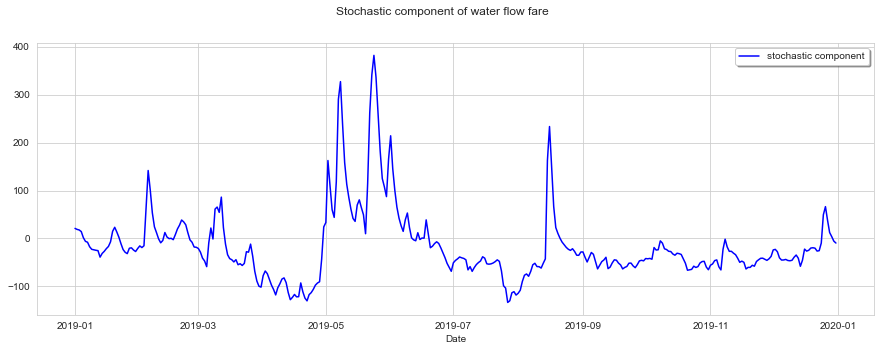

In [32]:
last_two_years=flow_m.loc[flow_m.ds >= '2019-01-01']
fig, axes = plt.subplots(figsize=(15, 5))
fig.suptitle('Stochastic component of water flow fare')
axes.plot(last_two_years.ds, last_two_years.y, label='stochastic component', color='blue')
axes.set_xlabel('Date')
axes.legend(shadow=True, fancybox=True)
plt.show()

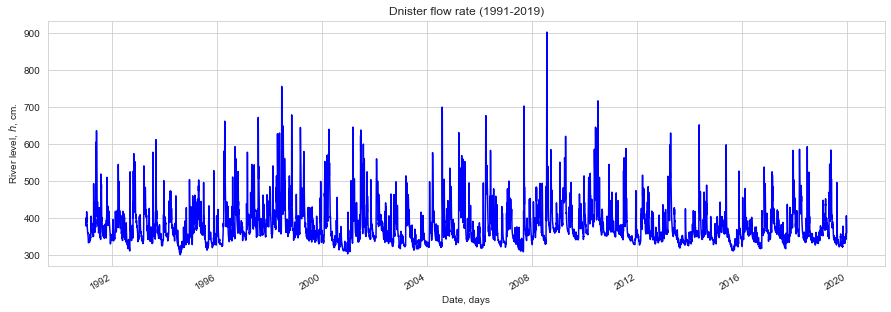

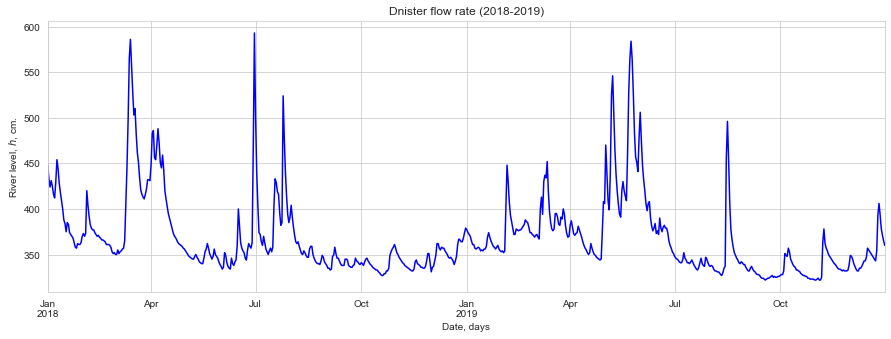

In [36]:
water_level_plot(level, title='Dnister flow rate (1991-2019)', freq='day', xlabel='Date, days')
last_two_years=level.loc[level.ds >= '2018-01-01']
water_level_plot(last_two_years, title='Dnister flow rate (2018-2019)', freq='day', xlabel='Date, days')
plt.show()

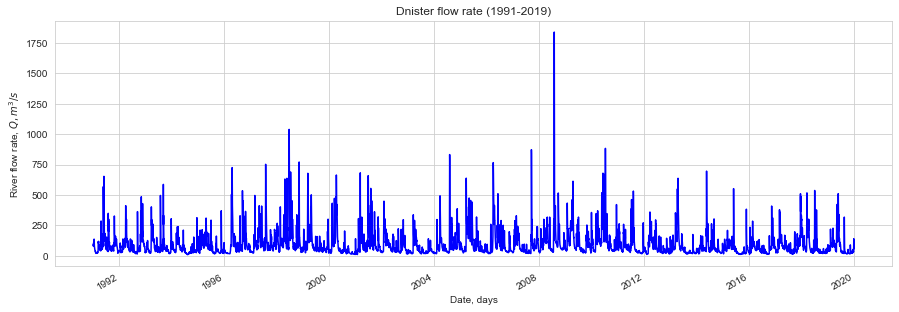

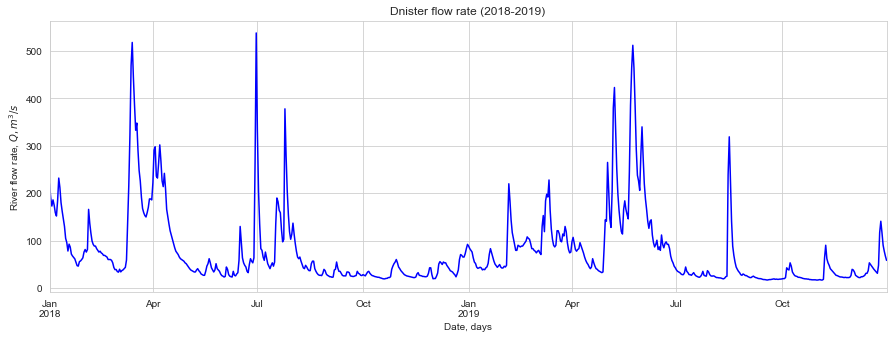

In [37]:
water_flow_plot(flow, title='Dnister flow rate (1991-2019)', freq='day', xlabel='Date, days')
last_two_years=flow.loc[flow.ds >= '2018-01-01']
water_flow_plot(last_two_years, title='Dnister flow rate (2018-2019)', freq='day', xlabel='Date, days')
plt.show()

In [38]:
h = 1
L = 2*365
Um = L*h

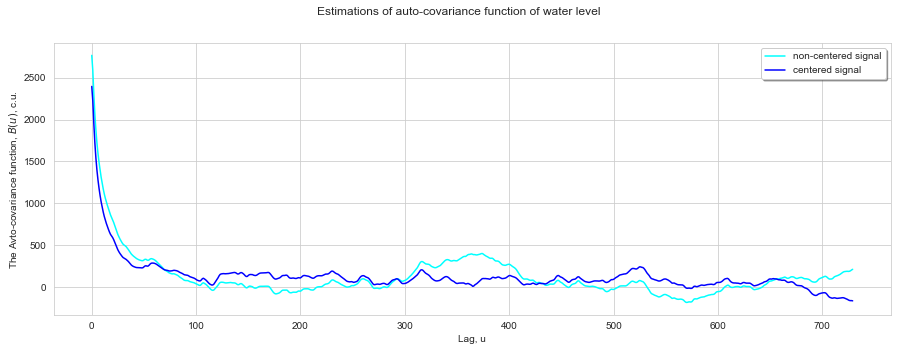

In [74]:
level_autocovariance = get_corelation_data(level, L, h)
level_m_autocovariance = get_corelation_data(level_m, L, h)
autocovariance_plot(level_autocovariance, 
                    level_m_autocovariance,
                    'Estimations of auto-covariance function of water level')

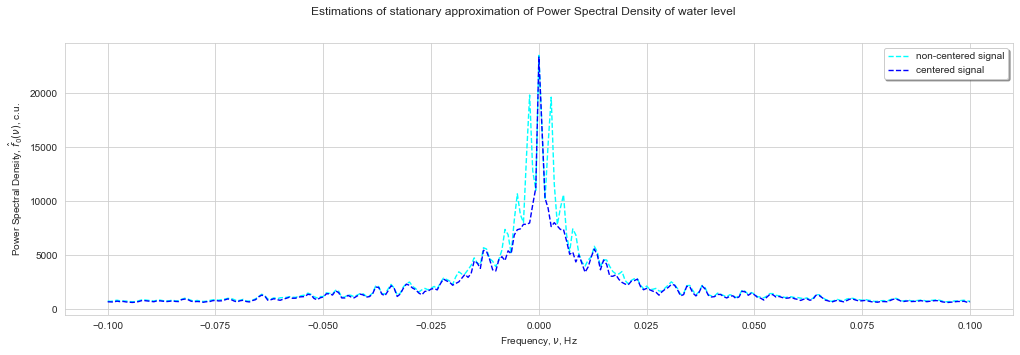

In [79]:
level_stationary_approxamation = spectral_density(level_autocovariance, L, 0, 2*3.14, 1400, h)
level_stationary_approxamation = level_stationary_approxamation.loc[
    (level_stationary_approxamation.index >=-0.1) & (level_stationary_approxamation.index <=0.1)
]

level_m_stationary_approxamation_m = spectral_density(level_m_autocovariance, L, 0, 2*3.14, 1400, h)
level_m_stationary_approxamation_m = level_m_stationary_approxamation_m.loc[
    (level_m_stationary_approxamation_m.index >=-0.1) & (level_m_stationary_approxamation_m.index <=0.1)
]
power_spectral_plot(level_stationary_approxamation, level_m_stationary_approxamation_m,
                    'Estimations of stationary approximation of Power Spectral Density of water level')


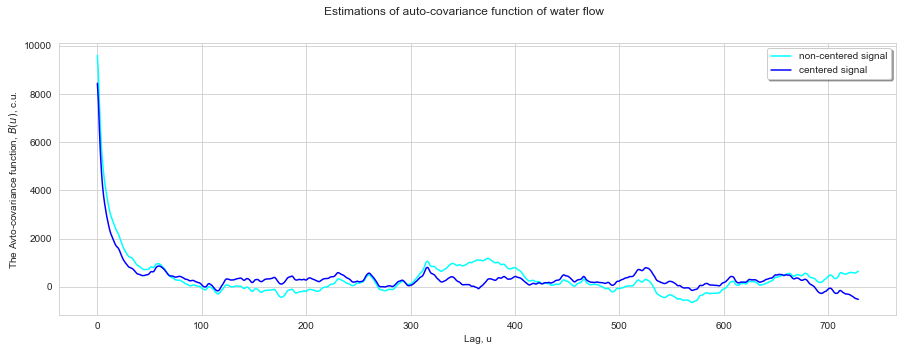

In [75]:
flow_autocovariance = get_corelation_data(flow, L, h)
flow_m_autocovariance = get_corelation_data(flow_m, L, h)
autocovariance_plot(flow_autocovariance, 
                    flow_m_autocovariance,
                    'Estimations of auto-covariance function of water flow')

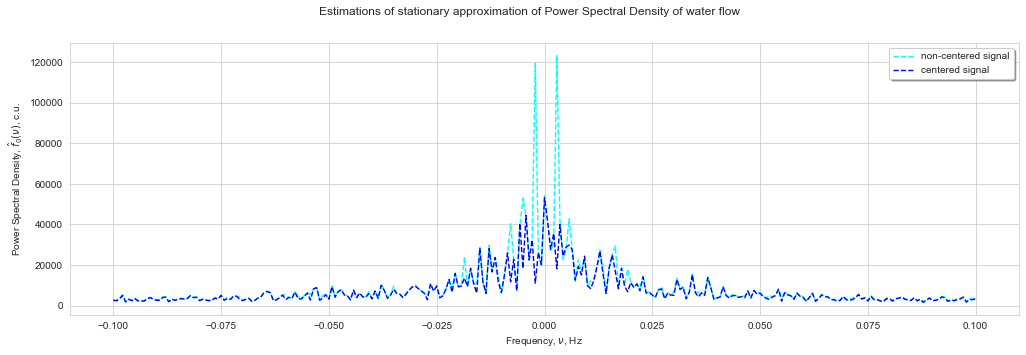

In [72]:
flow_stationary_approxamation = spectral_density(flow_autocovariance, L, 0, 2*3.14, 1400, h)
flow_stationary_approxamation = flow_stationary_approxamation.loc[
    (flow_stationary_approxamation.index >=-0.1) & (flow_stationary_approxamation.index <=0.1)
]

flow_m_stationary_approxamation = spectral_density(flow_m_autocovariance, L, 0, 2*3.14, 1400, h)
flow_m_stationary_approxamation = flow_m_stationary_approxamation.loc[
    (flow_m_stationary_approxamation.index >=-0.1) & (flow_m_stationary_approxamation.index <=0.1)
]
power_spectral_plot(flow_stationary_approxamation, flow_m_stationary_approxamation,
                    'Estimations of stationary approximation of Power Spectral Density of water flow')